In [1]:
# Import 3rd libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Import customized libraries
from pose_vector_to_transformation_matrix import pose_vector_to_transformation_matrix
from project_points import project_points
from undistort_image import undistort_image

# Load Camera Poses
Each row i of matrix 'poses' contains the transformations (6x1 vector representing the pose as [wx, wy, wz, tx, ty, tz]) that 
transforms points expressed in the world frame to points expressed in the camera frame.


In [2]:
poses = np.loadtxt("../data/poses.txt")

# Define 3D corner positions 
[Nx3] matrix containing the corners of the checkerboard as 3D points (X, Y, Z),
expressed in the world coordinate system

In [3]:
# Refer to images_undistorted img_0001.jpg
# The num of corners x is 9 (11-2)
# The num of corners y is 6 (8-2)
num_corners_x = 9
num_corners_y = 6
num_corners = num_corners_x * num_corners_y
# Assume the square length is 0.04 [m] of current checkerboard
square_length = 0.04 # [m]

# Create mesh grid row(num_corners_x), col(num_corners_y)
X, Y = np.meshgrid(np.arange(num_corners_x), np.arange(num_corners_y))

# Create corner position in world coordinate
p_W_corners = square_length * np.stack([X, Y], axis=-1).reshape([num_corners, 2])
# Add z coordinate, and set z = 0
p_W_corners = np.concatenate([p_W_corners, np.zeros([num_corners, 1])], axis=-1)

In [4]:
p_W_corners

array([[0.  , 0.  , 0.  ],
       [0.04, 0.  , 0.  ],
       [0.08, 0.  , 0.  ],
       [0.12, 0.  , 0.  ],
       [0.16, 0.  , 0.  ],
       [0.2 , 0.  , 0.  ],
       [0.24, 0.  , 0.  ],
       [0.28, 0.  , 0.  ],
       [0.32, 0.  , 0.  ],
       [0.  , 0.04, 0.  ],
       [0.04, 0.04, 0.  ],
       [0.08, 0.04, 0.  ],
       [0.12, 0.04, 0.  ],
       [0.16, 0.04, 0.  ],
       [0.2 , 0.04, 0.  ],
       [0.24, 0.04, 0.  ],
       [0.28, 0.04, 0.  ],
       [0.32, 0.04, 0.  ],
       [0.  , 0.08, 0.  ],
       [0.04, 0.08, 0.  ],
       [0.08, 0.08, 0.  ],
       [0.12, 0.08, 0.  ],
       [0.16, 0.08, 0.  ],
       [0.2 , 0.08, 0.  ],
       [0.24, 0.08, 0.  ],
       [0.28, 0.08, 0.  ],
       [0.32, 0.08, 0.  ],
       [0.  , 0.12, 0.  ],
       [0.04, 0.12, 0.  ],
       [0.08, 0.12, 0.  ],
       [0.12, 0.12, 0.  ],
       [0.16, 0.12, 0.  ],
       [0.2 , 0.12, 0.  ],
       [0.24, 0.12, 0.  ],
       [0.28, 0.12, 0.  ],
       [0.32, 0.12, 0.  ],
       [0.  , 0.16, 0.  ],
 

# Load camera Intrinsics

In [5]:
K = np.loadtxt("../data/K.txt")
D = np.loadtxt("../data/D.txt")

# Load one image with a given index

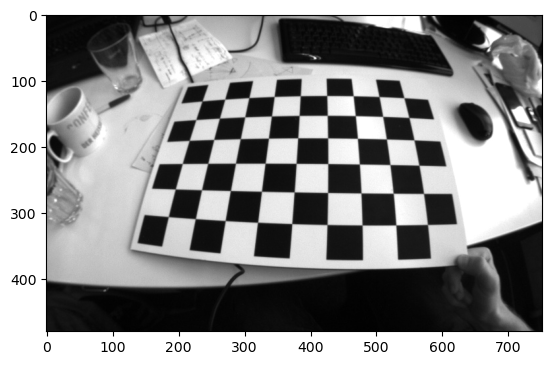

In [6]:
img_index = 421
img = cv2.imread("../data/images/img_{0:04d}.jpg".format(img_index), cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray')
# Display image

# Project the corners on the image
Compute the 4x4 homogeneous transformation matrix that maps points 
from the world to the camera coordinate frame

In [7]:
# Get current camera pose
T_C_W = pose_vector_to_transformation_matrix(poses[img_index])
T_C_W

[-0.4915091   0.14784013  0.0522336 ]


array([[ 0.98797772, -0.08548074,  0.12881409, -0.12819852],
       [ 0.01441348,  0.88053076,  0.47376981, -0.12679154],
       [-0.15392296, -0.46621736,  0.87117685,  0.43302025],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [8]:
# Transform 3d points from world to current camera pose

# Get homogeneous points
p_W_corners_H = np.concatenate([p_W_corners, np.ones([num_corners, 1])], axis=-1)
p_C_corners = np.matmul(T_C_W[None, :, :], p_W_corners_H[:,:,None] ).squeeze(-1)

In [9]:
p_C_corners

array([[-0.12819852, -0.12679154,  0.43302025,  1.        ],
       [-0.08867941, -0.126215  ,  0.42686333,  1.        ],
       [-0.0491603 , -0.12563846,  0.42070641,  1.        ],
       [-0.0096412 , -0.12506192,  0.41454949,  1.        ],
       [ 0.02987791, -0.12448538,  0.40839258,  1.        ],
       [ 0.06939702, -0.12390885,  0.40223566,  1.        ],
       [ 0.10891613, -0.12333231,  0.39607874,  1.        ],
       [ 0.14843524, -0.12275577,  0.38992182,  1.        ],
       [ 0.18795435, -0.12217923,  0.3837649 ,  1.        ],
       [-0.13161775, -0.09157031,  0.41437156,  1.        ],
       [-0.09209864, -0.09099377,  0.40821464,  1.        ],
       [-0.05257953, -0.09041723,  0.40205772,  1.        ],
       [-0.01306043, -0.08984069,  0.3959008 ,  1.        ],
       [ 0.02645868, -0.08926415,  0.38974388,  1.        ],
       [ 0.06597779, -0.08868761,  0.38358696,  1.        ],
       [ 0.1054969 , -0.08811108,  0.37743005,  1.        ],
       [ 0.14501601, -0.

# Display these corners on the image

In [10]:
p = project_points(p_C_corners[:,:3], K, D)
p

array([[236.81585858, 133.21468425],
       [271.11374057, 130.61762006],
       [307.52874768, 128.45246954],
       [345.68762548, 126.8076367 ],
       [385.0994187 , 125.76550372],
       [425.16522429, 125.39726814],
       [465.19960493, 125.7561224 ],
       [504.46832924, 126.86832229],
       [542.24864091, 128.72156923],
       [227.33235332, 161.34770951],
       [263.09001803, 159.30105567],
       [301.29998974, 157.61158063],
       [341.54950948, 156.35675652],
       [383.2795044 , 155.60896016],
       [425.79464902, 155.4308108 ],
       [468.28822686, 155.8689524 ],
       [509.88812277, 156.94583764],
       [549.73248335, 158.64894735],
       [217.31675866, 192.78227708],
       [254.515513  , 191.52806058],
       [294.54877908, 190.53202394],
       [336.96302088, 189.85043334],
       [381.12263565, 189.53527186],
       [426.22015865, 189.63065241],
       [471.30552276, 190.16803354],
       [515.34310659, 191.1598927 ],
       [557.30853901, 192.59141273],
 

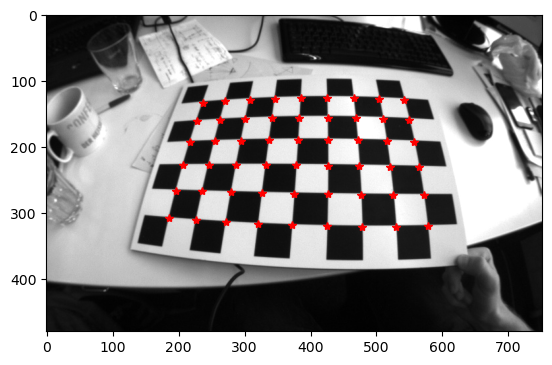

In [11]:
plt.imshow(img, cmap='gray')
plt.plot(p[:,0], p[:,1], 'r*')
plt.show()

# Undistort image with bilinear interpolation

In [12]:
undistort_img = undistort_image(img, K, D, bilinear_interpolation=False)
undistort_img_bi = undistort_image(img, K, D, bilinear_interpolation=True)

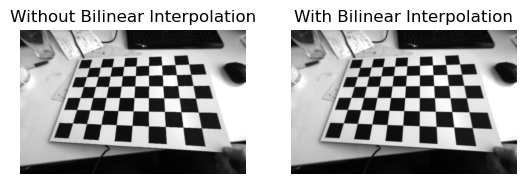

In [13]:
# Display result
fig, axs = plt.subplots(1, 2)
axs[0].imshow(undistort_img, cmap='gray')
axs[0].set_axis_off()
axs[0].set_title('Without Bilinear Interpolation')
axs[1].imshow(undistort_img_bi, cmap='gray')
axs[1].set_axis_off()
axs[1].set_title('With Bilinear Interpolation')
# plt.savefig("compare_result.png", dpi=1000)
plt.show()

# Calculate the cube points, then draw the image

In [14]:
# Calculate the cube points
gap = 0.04 # the checkerboard gap is 4cm 
cube_length = gap * 3 
offset_x = gap * 2
offset_y = gap * 2

X, Y, Z = np.meshgrid(np.arange(2), np.arange(2), np.arange(-1, 1))
cube_vertices_H = np.stack([X.flatten()*cube_length + offset_x,
                          Y.flatten()*cube_length + offset_y,
                          Z.flatten()*cube_length, np.ones([8])], axis=-1)
cube_pts = np.matmul(T_C_W[None, :, :], cube_vertices_H[:,:,None]).squeeze(-1)
cube_pts = cube_pts[:,:3]
cube_pix_distorted = project_points(cube_pts, K, D)
cube_pix_undistorted = np.matmul(K, cube_pts[:, :, None]).squeeze(-1)
cube_pix_undistorted /= cube_pix_undistorted[:, 2, None]
cube_pix_undistorted = cube_pix_undistorted[:, :2]

In [15]:
cube_pix_distorted

array([[254.26969259,  92.01924069],
       [294.54877908, 190.53202394],
       [426.75760274,  82.71383712],
       [426.22015865, 189.63065241],
       [207.02043392, 238.75534227],
       [271.73009835, 313.93808047],
       [430.25102597, 240.85292113],
       [425.19566688, 320.20287804]])

In [16]:
cube_pix_undistorted

array([[247.45861079,  81.33637308],
       [293.79123545, 189.7851549 ],
       [431.2699627 ,  72.14245437],
       [427.29253158, 188.71390956],
       [201.06743866, 238.29009307],
       [270.12605072, 315.16019001],
       [430.98591081, 240.76004671],
       [426.38442974, 321.38958095]])

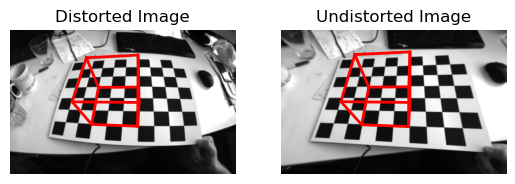

In [17]:
# Display result
lw = 2
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img, cmap='gray')
axs[0].set_axis_off()
axs[0].set_title('Distorted Image')
# base layer
axs[0].plot(cube_pix_distorted[[1, 3, 7, 5, 1], 0], cube_pix_distorted[[1, 3, 7, 5, 1], 1], 'r-', linewidth=lw)
# # top layer
axs[0].plot(cube_pix_distorted[[0, 2, 6, 4, 0], 0], cube_pix_distorted[[0, 2, 6, 4, 0], 1], 'r-', linewidth=lw)
# # vertical lines
axs[0].plot(cube_pix_distorted[[0, 1], 0], cube_pix_distorted[[0, 1], 1], 'r-', linewidth=lw)
axs[0].plot(cube_pix_distorted[[2, 3], 0], cube_pix_distorted[[2, 3], 1], 'r-', linewidth=lw)
axs[0].plot(cube_pix_distorted[[4, 5], 0], cube_pix_distorted[[4, 5], 1], 'r-', linewidth=lw)
axs[0].plot(cube_pix_distorted[[6, 7], 0], cube_pix_distorted[[6, 7], 1], 'r-', linewidth=lw)

axs[1].imshow(undistort_img_bi, cmap='gray')
axs[1].set_axis_off()
axs[1].set_title('Undistorted Image')
# base layer
axs[1].plot(cube_pix_undistorted[[1, 3, 7, 5, 1], 0], cube_pix_undistorted[[1, 3, 7, 5, 1], 1], 'r-', linewidth=lw)
# top layer
axs[1].plot(cube_pix_undistorted[[0, 2, 6, 4, 0], 0], cube_pix_undistorted[[0, 2, 6, 4, 0], 1], 'r-', linewidth=lw)
# vertical lines
axs[1].plot(cube_pix_undistorted[[0, 1], 0], cube_pix_undistorted[[0, 1], 1], 'r-', linewidth=lw)
axs[1].plot(cube_pix_undistorted[[2, 3], 0], cube_pix_undistorted[[2, 3], 1], 'r-', linewidth=lw)
axs[1].plot(cube_pix_undistorted[[4, 5], 0], cube_pix_undistorted[[4, 5], 1], 'r-', linewidth=lw)
axs[1].plot(cube_pix_undistorted[[6, 7], 0], cube_pix_undistorted[[6, 7], 1], 'r-', linewidth=lw)
# plt.savefig("draw_cube_compare_result.png", dpi=1000)
plt.show()
